In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gdown

In [ ]:
products_file_id = '1ATwj5A6yDHafhI7Az1DKgwX1UsDkuuAn'
products_url = f'https://drive.google.com/uc?id={products_file_id}'
products_table = 'Products Table.csv'

gdown.download(products_url, products_table, quiet=False)

In [2]:
products = pd.read_csv("Products Table.csv")

Number of products per category

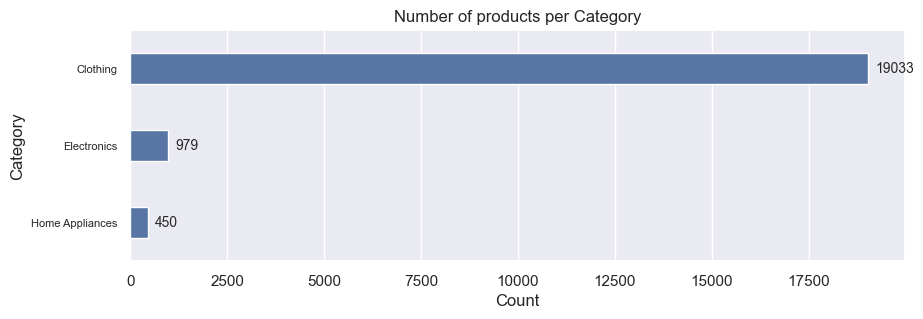

In [50]:
sorted_order = products['Category'].value_counts().index

plt.figure(figsize = (10, 3))
ax = sns.countplot(y = 'Category', data = products, order = sorted_order, width = 0.4)
plt.title('Number of Products per Category')
plt.xlabel('Count')
plt.tick_params(axis = 'y', labelsize = 8)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=5)

Distribution of Log-Price

Text(0.5, 0, 'Price')

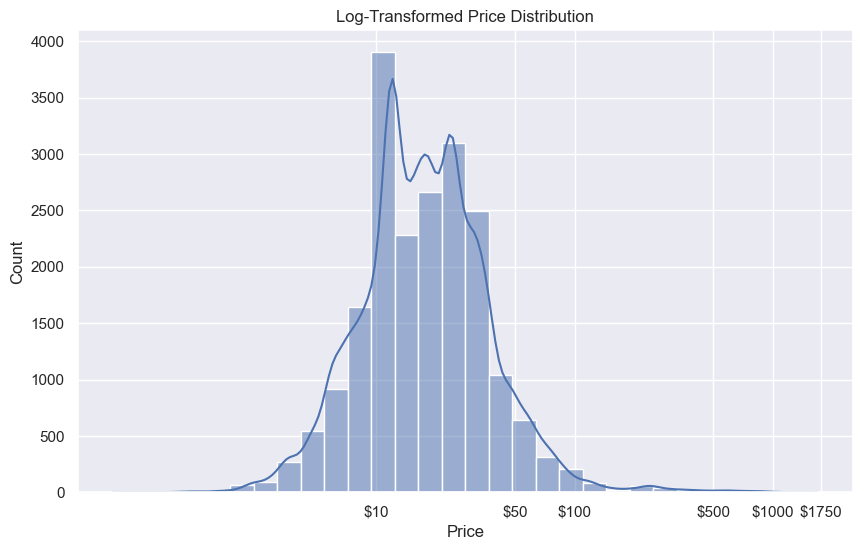

In [31]:
products['log_price'] = np.log(products['Price'])

plt.figure(figsize=(10, 6))
sns.histplot(products['log_price'], bins=30, kde=True)

log_ticks = [np.log(x) for x in [10, 50, 100, 500, 1000, 1750]]
price_labels = ['$10', '$50', '$100', '$500', '$1000', '$1750']
plt.xticks(log_ticks, price_labels)

plt.title('Log-Transformed Price Distribution')
plt.xlabel('Price')

# we can see that most products lie in the range of $10 - $50

Distribution of Prices for each Category

/var/folders/ds/x32_jrs12jv6kcrbpc456sh80000gn/T/ipykernel_21819/1516677725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronics['log_price'] = np.log(products['Price'])
/var/folders/ds/x32_jrs12jv6kcrbpc456sh80000gn/T/ipykernel_21819/1516677725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clothing['log_price'] = np.log(products['Price'])
/var/folders/ds/x32_jrs12jv6kcrbpc456sh80000gn/T/ipykernel_21819/1516677725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Text(0.5, 0, 'Price')

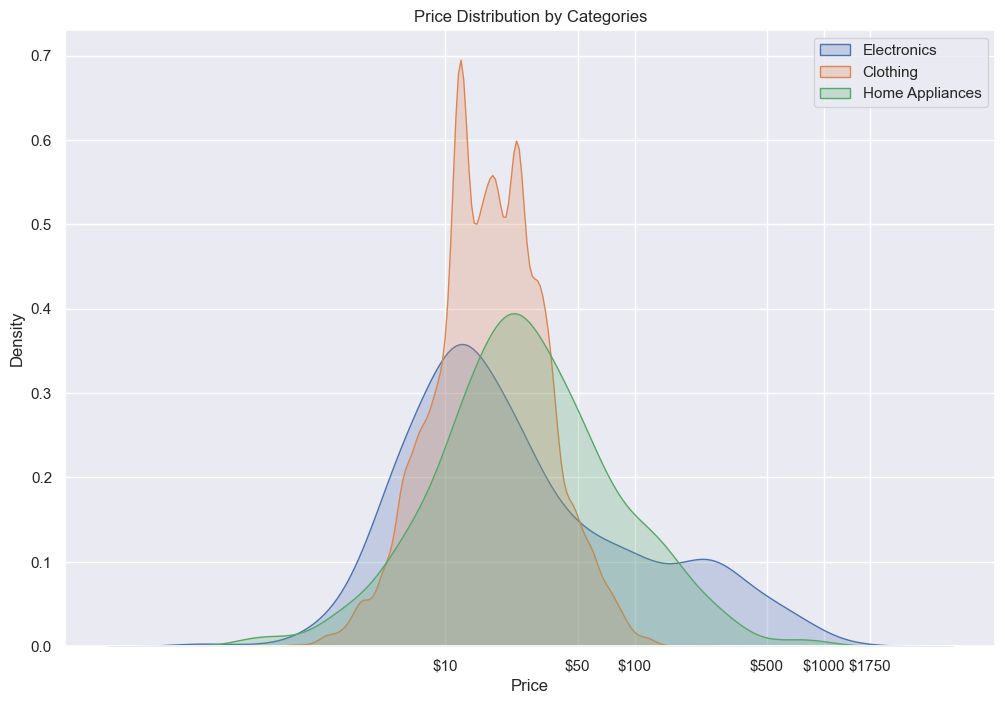

In [67]:
electronics = products[products['Category'] == 'Electronics']
clothing = products[products['Category'] == 'Clothing']
home = products[products['Category'] == 'Home Appliances']

electronics['log_price'] = np.log(products['Price'])
clothing['log_price'] = np.log(products['Price'])
home['log_price'] = np.log(products['Price'])

sns.kdeplot(electronics['log_price'], fill = True, label = 'Electronics')
sns.kdeplot(clothing['log_price'], fill = True, label = 'Clothing')
sns.kdeplot(home['log_price'], fill = True, label = 'Home Appliances')

log_ticks = [np.log(x) for x in [10, 50, 100, 500, 1000, 1750]]
price_labels = ['$10', '$50', '$100', '$500', '$1000', '$1750']
plt.xticks(log_ticks, price_labels)
plt.legend()

plt.title('Price Distribution by Categories')
plt.xlabel('Price')

Mean prices of products in each category

Text(0, 0.5, 'Category')

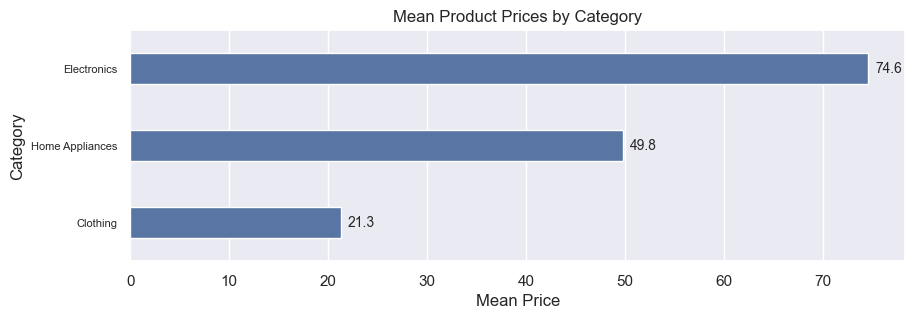

In [53]:
mean_prices = products.groupby('Category')['Price'].mean().reset_index()
mean_prices['Price'] = mean_prices['Price'].round(1)
mean_prices = mean_prices.sort_values(by='Price', ascending=False)

plt.figure(figsize = (10, 3))
ax = sns.barplot(x='Price', y='Category', data=mean_prices, width = 0.4)
plt.tick_params(axis = 'y', labelsize = 8)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=5)

plt.title('Mean Product Prices by Category')
plt.xlabel('Mean Price')
plt.ylabel('Category')